### Load Data

In [29]:
import pandas as pd

# Input path and filename
path = 'D:/Git_Projects/5. Master_thesis/Datasets/Output_files/'

# Load files into a pandas dataframes
file = path + '1.xlsx'
df = pd.concat(pd.read_excel(file, sheet_name=None), ignore_index=True)

# Set index
df = df.set_index("Date").asfreq('MS')

# Dependant variable 
dep_var = 'Orders'

In [30]:
df

,Orders,CCI,CPI,Unemployment_rate,Long_term_interest_rates,Avg_Fuel_Price,TIV
Date,,,,,,,
2006-01-01,1124,100.83240,0.807265,8.3,3.280000,1.170000,20177
2006-02-01,1079,100.80160,0.901804,8.0,3.440000,1.186667,12845
2006-03-01,1210,100.60100,0.899101,7.7,3.620000,1.180000,15163
2006-04-01,1147,100.48250,1.297405,7.7,3.880000,1.243333,13472
2006-05-01,1001,100.56730,1.701702,7.9,3.940000,1.260000,16516
...,...,...,...,...,...,...,...
2022-08-01,254,94.58021,7.616082,7.2,1.624904,2.153333,8163
2022-09-01,228,94.10754,8.119296,7.3,2.420836,2.133333,7867
2022-10-01,188,93.96142,8.310766,6.4,2.894486,2.136667,7132


### Split Data

In [24]:
# Split data
steps = 36  # Number of months of testing
train = df[:-steps]
test  = df[-steps:]

print(f"Dataset length : (n={len(df)})")
print(f"Train dates    : {train.index.min()} --- {train.index.max()}  (n={len(train)})")
print(f"Test dates     : {test.index.min()} --- {test.index.max()}  (n={len(test)})")

# Select input and target variables
X_train = train.drop(dep_var, axis=1)
X_test = test.drop(dep_var, axis=1)
y_train = train[dep_var]
y_test = test[dep_var]

Dataset length : (n=192)
Train dates    : 2007-01-01 00:00:00 --- 2019-12-01 00:00:00  (n=156)
Test dates     : 2020-01-01 00:00:00 --- 2022-12-01 00:00:00  (n=36)


In [25]:
X_train.shape, X_test.shape

((156, 9), (36, 9))

### Scoring function

In [27]:
# Importing the metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Importing the modules
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.graph_objs as go

metrics = pd.DataFrame()

def scoring(model_name, model, X_train_set, y_train_set, features, labels):

    # Fit the regressor to the training data
    model.fit(X_train_set, y_train_set)    
    
    # Make predictions
    predictions = model.predict(features)
    
    # Calculate metrics
    mae = mean_absolute_error(labels, predictions)                      # MAE (Mean Absolute Error)
    mse = mean_squared_error(labels, predictions)                       # MSE (Mean Squared Error)
    rmse = math.sqrt(mse)                                               # RMSE (Root Mean Squared Error)
    r2 = r2_score(labels, predictions)                                  # R2 (R-squared - Coeficient of determination)                           
    mape = np.mean(np.abs((labels - predictions) / labels)) * 100       # MAPE
    accuracy = 100 - mape                                               # Accuracy

    # Append metrics for summary
    metrics[model_name] = [mae, mse, rmse, r2, mape, accuracy]
    metrics.index = ['Mean Absolute Error', 
                    'Mean Squared Error', 
                    'Root Mean Squared Error',
                    'R^2',
                    'Mean Absolute Percentage Error',
                    'Accuracy']
    
    # Print metrics  
    print(model_name, 'Model Performance:')                             # Model name
    print('Mean Absolute Error: {:0.2f}.'.format(mae))                  # MAE
    print('Mean Squared Error: {:0.2f}.'.format(mse))                   # MSE
    print('Root Mean Squared Error: {:0.2f}.'.format(rmse))             # RMSE  
    print('R^2 Score = {:0.2f}.'.format(r2))                            # R2
    print('Mean Absolute Percentage Error: {:0.2f}%.'.format(mape))     # MAPE 
    print('Accuracy = {:0.2f}%.'.format(accuracy))                      # Accuracy

    df = pd.DataFrame(labels)
        
    # Plot Actual values vs predicted values
    fig= go.Figure()
    fig.add_trace(go.Scatter(dict(x=df.index, y=labels, mode='lines+markers', name= 'Actual')))
    fig.add_trace(go.Scatter(dict(x=df.index, y=predictions, mode='lines+markers', name= 'Predicted')))
    fig.update_layout(title=go.layout.Title(
        text='Actual vs Predictions with ' + model_name,
        xref='paper',x=0),
        margin=dict(l=10, r=0, t=50, b=50),
    xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='Date',font=dict(
        family='Courier New, monospace',
        size=18,
        color='#7f7f7f'))),
    yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='Cars',font=dict(
        family='Courier New, monospace',
        size=18,
        color='#7f7f7f'))))
    fig.show()   

    fig= go.Figure()
    fig.add_trace(go.Scatter(dict(x=train.index, y=train[dep_var], mode='lines+markers', name= 'Train')))
    fig.add_trace(go.Scatter(dict(x=test.index, y=test[dep_var], mode='lines+markers', name= 'Test')))
    fig.add_trace(go.Scatter(dict(x=test.index, y=predictions, mode='lines+markers', name= 'Forecast')))
    fig.update_layout(title=go.layout.Title(
        text='Actual vs Predictions',
        xref='paper',x=0),
        margin=dict(l=10, r=0, t=50, b=50),
    xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='Date')),
    yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='Cars')))
    fig.show()     

### XGBoost (Extreme Gradient Boosting)

#### Baseline

In [28]:
import xgboost as xgb

# Import XGBRegressor
from xgboost import XGBRegressor         
          
# Instantiate the regressor
xgb_model = XGBRegressor()

# Compute and print model score
scoring(xgb_model.__class__.__name__, xgb_model, X_train, y_train, X_test, y_test)

XGBRegressor Model Performance:
Mean Absolute Error: 189.30.
Mean Squared Error: 39971.33.
Root Mean Squared Error: 199.93.
R^2 Score = -3.17.
Mean Absolute Percentage Error: 73.54%.
Accuracy = 26.46%.


In [8]:
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

### Feature importance

https://towardsdatascience.com/be-careful-when-interpreting-your-features-importance-in-xgboost-6e16132588e7


In [9]:
feature_importance = pd.DataFrame(
                  {'Feature': df.drop(columns = dep_var).columns,
                   'Importance': xgb_model.feature_importances_}
                            )
feature_importance = feature_importance.sort_values('Importance', ascending=False)

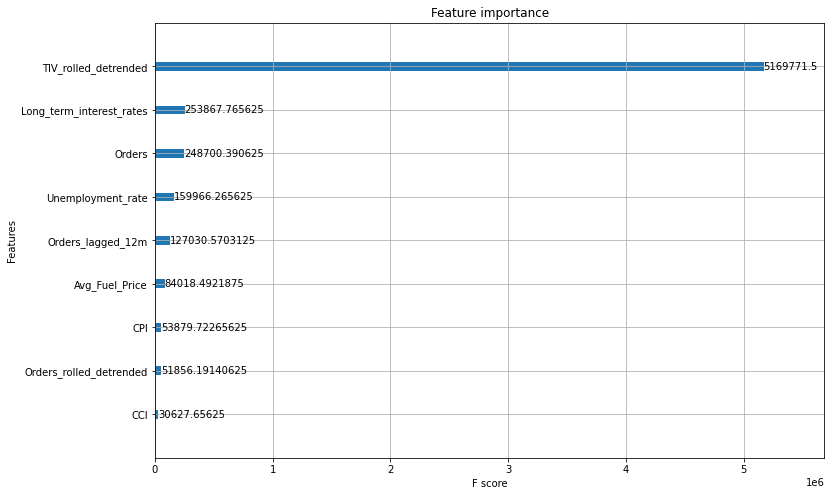

In [10]:
from xgboost import plot_importance
#importance_types = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
fig, ax = plt.subplots(figsize=(12,8))
plot_importance(xgb_model, ax=ax, importance_type='gain') 
plt.show();

#### Feature Selection

In [11]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel

# Fit model using each importance as a threshold
thresholds = sort(xgb_model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xgb_model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    select_X_test = selection.transform(X_test)

    # Fit the regressor to the training data
    selection_model = XGBRegressor(random_state=42)
    selection_model.fit(select_X_train, y_train)    
    
    # Make predictions
    y_pred = selection_model.predict(select_X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)                      # MAE (Mean Absolute Error)
    mse = mean_squared_error(y_test, y_pred)                       # MSE (Mean Squared Error)
    rmse = math.sqrt(mse)                                          # RMSE (Root Mean Squared Error)
    r2 = r2_score(y_test, y_pred)                                  # R2 (R-squared - Coeficient of determination)                           
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100       # MAPE
    accuracy = 100 - mape                                          # Accuracy
    
    # Print metrics
    print("Thresh=%.3f, n=%d, MAE=%.3f, MSE=%.3f, RMSE==%.3f, R2==%.3f, MAPE==%.3f, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], mae, mse, rmse, r2, mape, accuracy))


Thresh=0.005, n=9, MAE=622.841, MSE=546730.368, RMSE==739.412, R2==0.756, MAPE==7.471, Accuracy: 92.53%
Thresh=0.008, n=8, MAE=563.469, MSE=454375.497, RMSE==674.074, R2==0.798, MAPE==6.810, Accuracy: 93.19%
Thresh=0.009, n=7, MAE=701.311, MSE=771810.525, RMSE==878.527, R2==0.656, MAPE==8.550, Accuracy: 91.45%
Thresh=0.014, n=6, MAE=702.869, MSE=713149.583, RMSE==844.482, R2==0.682, MAPE==8.466, Accuracy: 91.53%
Thresh=0.021, n=5, MAE=706.736, MSE=770120.334, RMSE==877.565, R2==0.657, MAPE==8.558, Accuracy: 91.44%
Thresh=0.026, n=4, MAE=772.643, MSE=880782.310, RMSE==938.500, R2==0.608, MAPE==9.374, Accuracy: 90.63%
Thresh=0.040, n=3, MAE=603.416, MSE=585676.427, RMSE==765.295, R2==0.739, MAPE==7.139, Accuracy: 92.86%
Thresh=0.041, n=2, MAE=1284.921, MSE=2230301.332, RMSE==1493.419, R2==0.006, MAPE==16.171, Accuracy: 83.83%
Thresh=0.837, n=1, MAE=1483.891, MSE=3357127.946, RMSE==1832.247, R2==-0.496, MAPE==18.357, Accuracy: 81.64%


In [12]:
max_features = [3]
for mf in max_features:
    selected_features = feature_importance[:mf].Feature.values

    X_train_fs = X_train[selected_features]
    X_test_fs = X_test[selected_features]

    # Compute and print model score with feature selection
    model_name = xgb_model.__class__.__name__ + '- ' + str(mf) + ' FS'
    scoring(model_name, xgb_model, X_train_fs, y_train, X_test_fs, y_test)

XGBRegressor- 3 FS Model Performance:
Mean Absolute Error: 617.06.
Mean Squared Error: 601728.69.
Root Mean Squared Error: 775.71.
R^2 Score = 0.73.
Mean Absolute Percentage Error: 7.35%.
Accuracy = 92.65%.


#### Hyperparameter tuning

In [13]:
from sklearn.model_selection import GridSearchCV

# Set hyperparameters possibilities for model tuning
xgb_n_estimators = [100, 500, 1000]
xgb_max_depth = [4, 6, 8]
xgb_min_child_weight = [1, 3, 5]
xgb_eta = [0.01, 0.1, 0.2, 0.3]
xgb_subsample = [0.9, 0.5, 0.2, 0.1]
xgb_objective = ['reg:squarederror', 'reg:squaredlogerror']

# Create the grid
param_grid = {'n_estimators': xgb_n_estimators,
            'max_depth': xgb_max_depth,
            'min_child_weight': xgb_min_child_weight,
            'eta': xgb_eta,
            'subsample': xgb_subsample,
            'objective': xgb_objective}

# Tune the Model
model_base = XGBRegressor(random_state=42)

model_grid = GridSearchCV(estimator = model_base, param_grid = param_grid, cv = 5, verbose = 1)

model_grid.fit(X_train, y_train)

model_grid.best_params_

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",model_grid.best_estimator_)
print("\n The best score across ALL searched params:\n",model_grid.best_score_)
print("\n The best parameters across ALL searched params:\n",model_grid.best_params_)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


#### Tuned Model

In [125]:
# Create the fnal Extreme Gradient Booster with the best estimator
model_tuned = model_grid.best_estimator_

# Fit the regressor to the training data
model_tuned.fit(X_train, y_train)

# Compute and print model score
model_name = model_tuned.__class__.__name__ + ' Tuned'
scoring(model_name, model_tuned, X_train, y_train, X_test, y_test)

XGBRegressor Tuned Model Performance:
Mean Absolute Error: 94.04.
Mean Squared Error: 13386.41.
Root Mean Squared Error: 115.70.
R^2 Score = 0.12.
Mean Absolute Percentage Error: 32.65%.
Accuracy = 67.35%.


### LGBM (Light Gradient Boosting Model)

#### Baseline

In [126]:
import lightgbm as lgbm

# Import LightGBM Regressor
from lightgbm import LGBMRegressor
          
# Instantiate the regressor
model = LGBMRegressor(random_state=42)

# Compute and print model score
scoring(model.__class__.__name__, model, X_train, y_train, X_test, y_test)

LGBMRegressor Model Performance:
Mean Absolute Error: 87.57.
Mean Squared Error: 10790.37.
Root Mean Squared Error: 103.88.
R^2 Score = 0.29.
Mean Absolute Percentage Error: 29.08%.
Accuracy = 70.92%.


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

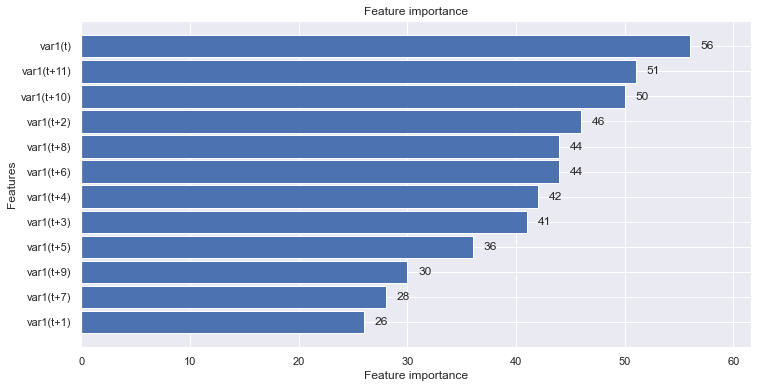

In [127]:
lgbm.plot_importance(model, max_num_features = 60, height=.9)

#### Hyperparameter tuning

In [132]:
from sklearn.model_selection import GridSearchCV

# Set hyperparameters possibilities for model tuning
lgbm_n_estimators = [100, 500, 1000]
lgbm_max_depth = [4, 6, 8]
lgbm_num_leaves = [3, 5, 7]
lgbm_learning_rate = [0.01, 0.1, 0.2, 0.3]
lgbm_subsample = [0.9, 0.5, 0.2, 0.1]

# Create the grid
param_grid = {'n_estimators': lgbm_n_estimators,
            'max_depth': lgbm_max_depth,
            'num_leaves': lgbm_num_leaves,
            'learning_rate': lgbm_learning_rate,
            'subsample': lgbm_learning_rate
           }

# Tune the Model
model_base = LGBMRegressor(random_state=42)

model_grid = GridSearchCV(estimator = model_base, param_grid = param_grid, cv = 5, verbose = 1)

model_grid.fit(X_train, y_train)

model_grid.best_params_

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",model_grid.best_estimator_)
print("\n The best score across ALL searched params:\n",model_grid.best_score_)
print("\n The best parameters across ALL searched params:\n",model_grid.best_params_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
 Results from Grid Search 

 The best estimator across ALL searched params:
 LGBMRegressor(learning_rate=0.01, max_depth=4, num_leaves=5, random_state=42,
              subsample=0.01)

 The best score across ALL searched params:
 -0.13986303759842253

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100, 'num_leaves': 5, 'subsample': 0.01}


#### Tuned Model

In [133]:
# Create the fnal LightGBM Model
model_tuned = model_grid.best_estimator_

# Compute and print model score
model_name = model_tuned.__class__.__name__ + ' Tuned'
scoring(model_name, model_tuned, X_train, y_train, X_test, y_test)

LGBMRegressor Tuned Model Performance:
Mean Absolute Error: 143.23.
Mean Squared Error: 29427.41.
Root Mean Squared Error: 171.54.
R^2 Score = -0.94.
Mean Absolute Percentage Error: 51.68%.
Accuracy = 48.32%.


### Random Forest

#### Baseline

In [134]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
          
# Instantiate the regressor
model = RandomForestRegressor(random_state=42)

# Compute and print model score
scoring(model.__class__.__name__, model, X_train, y_train, X_test, y_test)

RandomForestRegressor Model Performance:
Mean Absolute Error: 86.99.
Mean Squared Error: 11397.83.
Root Mean Squared Error: 106.76.
R^2 Score = 0.25.
Mean Absolute Percentage Error: 28.73%.
Accuracy = 71.27%.


#### Hyperparameter tuning

In [135]:
from sklearn.model_selection import GridSearchCV

# Set hyperparameters possibilities for model tuning 
rf_n_estimators = [100, 500, 1000]
rf_max_depth = [4, 6, 8, 10]
rf_max_features = ['auto', 'sqrt']
rf_min_samples_leaf = [1, 2, 4]
rf_min_samples_split = [2, 5, 10]
rf_bootstrap = [True, False]

# Create the grid
param_grid = {'n_estimators': rf_n_estimators,
           'max_depth': rf_max_depth,
           'max_features': rf_max_features,
           'min_samples_leaf': rf_min_samples_leaf,
           'min_samples_split': rf_min_samples_split,
           'bootstrap': rf_bootstrap
        }

# Tune the Model
model_base = RandomForestRegressor(random_state=42)

model_grid = GridSearchCV(estimator = model_base, param_grid = param_grid, cv = 5, verbose = 1)

model_grid.fit(X_train, y_train)

model_grid.best_params_

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",model_grid.best_estimator_)
print("\n The best score across ALL searched params:\n",model_grid.best_score_)
print("\n The best parameters across ALL searched params:\n",model_grid.best_params_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(bootstrap=False, max_depth=6, min_samples_leaf=4,
                      min_samples_split=10, n_estimators=1000, random_state=42)

 The best score across ALL searched params:
 -0.09697302877592359

 The best parameters across ALL searched params:
 {'bootstrap': False, 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 1000}


Tuned Model

In [136]:
# Create the fnal Random Forest Regressor Model
model_tuned = model_grid.best_estimator_

# Compute and print model score
model_name = model_tuned.__class__.__name__ + ' Tuned'
scoring(model_name, model_tuned, X_train, y_train, X_test, y_test)

RandomForestRegressor Tuned Model Performance:
Mean Absolute Error: 99.57.
Mean Squared Error: 19685.35.
Root Mean Squared Error: 140.30.
R^2 Score = -0.30.
Mean Absolute Percentage Error: 27.26%.
Accuracy = 72.74%.


### Summary

In [17]:
pd.options.display.float_format = "{:,.2f}".format
metrics

,XGBRegressor,XGBRegressor with 5 Feature Selection,XGBRegressor with 4 Feature Selection,XGBRegressor with 6 Feature Selection,XGBRegressor- 5 FS
Mean Absolute Error,122.49,111.08,146.66,116.15,111.08
Mean Squared Error,"20,555.90","17,377.91","29,476.89","19,972.61","17,377.91"
Root Mean Squared Error,143.37,131.83,171.69,141.32,131.83
R^2,-0.36,-0.15,-0.95,-0.32,-0.15
Mean Absolute Percentage Error,36.10,33.13,45.49,33.67,33.13
Accuracy,63.90,66.87,54.51,66.33,66.87


### Feature engineering ?

In [ ]:
df['Year'] = df.index.astype(str).str[:4]
df['Month'] = df.index.astype(str).str[5:7]

df['Year'] = pd.DatetimeIndex(df.index).year
df['Month'] = [d.strftime('%b') for d in df.index]